<a href="https://colab.research.google.com/github/LibbyFender/Learning/blob/master/SPEX650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

American University
SPEX 650 Quantitative Analysis
May - June 2020

Ticket Time Machine Research

In [1]:
#Library imports and loading data (5/27/2020)
import pandas as pd
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
sns.set_style('ticks')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Task complete 5/30/20
To-do List, connect google results directly to this form. It is currently from local .csv
df = pd.read_csv('/Survey_1Responses.csv')
/Survey_1Responses.csv  /content/drive/My Drive/Survey_1Responses.gsheet

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


#Load dataframe from google workbook 5/30

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/XXXXXXXXXXXXXXXXXXXXX')

In [0]:
sheet = wb.worksheet('Form Responses 1')
data = sheet.get_all_values()
df = pd.DataFrame(data)

In [0]:
df.head()

,Timestamp,What is your age?,What is your current 5 digit zip or postal code?,"We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending live music events.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending live sports.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending outdoor festivals.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending cultural events and festivals.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending live performances, such as theatre and dance.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [When I attend a live event I buy a souvenir.]",How many live events have you attended for entertainment in the previous 18 months?,"We would like to know more about how you prefer to gain admission to live events. [When I receive a printed ticket, I save the ticketstub.]","We would like to know more about how you prefer to gain admission to live events. [If given a choice between a printed ticket or an e-ticket, I would prefer printed.]","We would like to know more about how you prefer to gain admission to live events. [If given a choice between a printed ticket or a mobile ticket, I would prefer printed.]","We would like to know more about how you prefer to gain admission to live events. [If a printed ticket is offered in addition to a mobile or e-ticket, I would want a printed ticket.]","We would like to know more about how you prefer to gain admission to live events. [If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I attend a live event with personal significance, such as a family reunion or a loved ones' first game, I will purchase a printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I attend a live event with personal significance, such as a family reunion or a loved ones' first game, I will purchase a customized printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I attend a live event with significance to the team or performer, such as a no-hitter, I will purchase a printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I attend a live event with significance to the team or performer, such as a no hitter, I will purchase a customized ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I was not in attendance when a significant event occurred for the team or performer, I will purchase a printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I was not in attendance when a significant event occurred for the team or performer, I will purchase a customized ticket.]",When might you buy a custom ticket?,Anything else you think we should know? Feel free to share:
0,5/26/2020 22:19:45,35-44,98056.0,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Agree,Agree,7-9,Often,Often,Often,Always,Some events,Often,Some events,Rarely,Some events,Some events,Rarely,"First Date, Rivalry Game, testing","This is Libby, testing the form and feedback!"
1,5/26/2020 22:58:21,25-34,NaN,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,St

5/30/20 Update: when connecting directly from gsheet, column names become first row of data. I will need to either research how to ID column names directly in google sheet, or correct here.

5/28 note: Updating column names for ease of use. Current column names are questions from survey.
5/30 note: not ideal method for a google sheet.

# Load dataframe from local .csv

In [0]:
df = pd.read_csv('Survey_1Responses.csv')
# /Survey_1Responses.csv /content/drive/My Drive/Survey_1Responses.gsheet

In [3]:
df.shape

(30, 23)

In [0]:
columns = ['quizTaken', 'age', 'zip', 'enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'event_att', 'save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust','na_printed', 'na_cust', 'when_cust', 'open']
df = df.iloc[1:] #Observations in Row 1 deleted. They are my responses from testing the form and entering random gibberish.

In [0]:
print(len(columns), len(df.columns))

23 23


In [0]:
df.columns =columns

In [7]:
df.head(3)

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open
1,5/26/2020 22:58:21,25-34,NaN,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Strongly Agree,Agree,13 or more.,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never,NaN,NaN
2,5/26/2020 23:28:55,35-44,83712.0,Disagree,Agree,Strongly Disagree,Agree,Neither Agree nor Disagree,Disagree,0 - 1,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Enlightening or life changing experience,NaN
3,5/26/2020 23:47:14,45-54,98056.0,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,2-3,Never,Rarely,Rarely,Some events,Never,Some events,Some events,Rarely,Rarely,Never,Never,"First Concert, game or event, Family Vacation,...",You are swell!


In [0]:
#5/28 Notes As expected, zip is a float, all other items are object types. We need to change to numerical values and address null value in zip code.
df.info()
#5/30 Notes: when loaded from a google sheet, null values are not flagged as null, and all items, including zip code are object type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 1 to 29
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quizTaken           29 non-null     object 
 1   age                 29 non-null     object 
 2   zip                 28 non-null     float64
 3   enjoy_music         29 non-null     object 
 4   enjoy_sports        28 non-null     object 
 5   enjoy_outdoor       29 non-null     object 
 6   enjoy_culture       28 non-null     object 
 7   enjoy_performances  28 non-null     object 
 8   buy_souvenir        28 non-null     object 
 9   event_att           29 non-null     object 
 10  save_stub           28 non-null     object 
 11  prefer1             28 non-null     object 
 12  prefer2             28 non-null     object 
 13  want_printed        28 non-null     object 
 14  buy_printed         28 non-null     object 
 15  ps_printed          28 non-null     object 
 16  ps_cust   

In [0]:
print(df.zip.describe(), df.zip.sum())
#Min and Max suggest acceptable range. Sum is a whole number, which suggests whole numbers.
#5/30 Note, because zip now an object, the sum combines them like a string. This code does not make sense after adjusting to sheet upload.

count       28.000000
mean     83211.857143
std      27827.120878
min       7726.000000
25%      89178.750000
50%      98082.000000
75%      98364.500000
max      99336.000000
Name: zip, dtype: float64 2329932.0


In [8]:
print(len(df.quizTaken), df.quizTaken.max(), df.quizTaken.min())

29 6/6/2020 14:01:56 5/26/2020 22:58:21


In [0]:
df.zip.fillna('00000', inplace=True)

In [0]:
df['zip'] = df.zip.astype(int)

In [11]:
df.info()
#I'm thinking more about this... Zip codes are categorial, not integers. They hold no rank, but lower number is East Coast and higher number is West coast.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 1 to 29
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   quizTaken           29 non-null     object
 1   age                 29 non-null     object
 2   zip                 29 non-null     int64 
 3   enjoy_music         29 non-null     object
 4   enjoy_sports        28 non-null     object
 5   enjoy_outdoor       29 non-null     object
 6   enjoy_culture       28 non-null     object
 7   enjoy_performances  28 non-null     object
 8   buy_souvenir        28 non-null     object
 9   event_att           29 non-null     object
 10  save_stub           28 non-null     object
 11  prefer1             28 non-null     object
 12  prefer2             28 non-null     object
 13  want_printed        28 non-null     object
 14  buy_printed         28 non-null     object
 15  ps_printed          28 non-null     object
 16  ps_cust             27 non-n

In [12]:
df.groupby('age').agg('count').iloc[:, 2:6]
#Our target market is 25-54, and we have 17 responses (5/27) in that range. (-1 that is mine for testing purposes) This is good news for us. Course requirements are met.
#5/30 update: 23 responses in our target market, 27 total responses. We can see count of responses by age. This tells me that null values for this bank of questions are from respondants outside of our target demographic, 25-54.

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture
age,,,,
25-34,6,6,6,6
35-44,11,11,11,11
45-54,7,7,7,7
55-64,3,2,3,2
65+,2,2,2,2


Bar Chart (Column Chart) showing frequency of age groups within our target market.

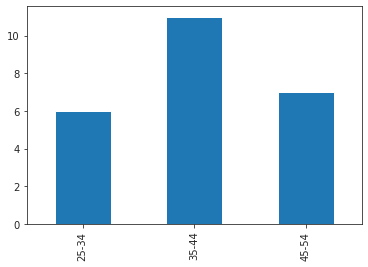

In [0]:
age_bins = ['25-34', '35-44', '45-54']
df.age.value_counts().loc[age_bins].plot(kind='bar')

I'm just playing around, and unlikely to keep most of this:

In [0]:
age_group = df.groupby('age').agg('count').iloc[:, 2:7]

In [0]:
age_group

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances
age,,,,,
25-34,6,6,6,6,6
35-44,10,10,10,10,10
45-54,7,7,7,7,7
55-64,3,2,3,2,2
65+,2,2,2,2,2


In [0]:
enjoy =age_group.transpose()

In [0]:
#Count of responses, not valued As of 6/2/20 no null values in our target demographic
enjoy

age,25-34,35-44,45-54,55-64,65+
enjoy_music,6,10,7,3,2
enjoy_sports,6,10,7,2,2
enjoy_outdoor,6,10,7,3,2
enjoy_culture,6,10,7,2,2
enjoy_performances,6,10,7,2,2


In [0]:
df_q_likert_2

,Never,Rarely,Some events,Often,Always
save_stub,6,5,6,4,3
prefer1,3,11,6,1,3
prefer2,3,11,8,0,2
want_printed,3,6,8,4,3
buy_printed,16,4,1,2,1
ps_printed,8,8,4,1,3
ps_cust,11,4,4,3,2
ts_printed,10,9,2,1,2
ts_cust,11,9,2,0,2
na_printed,19,2,2,0,1


This is a count of responses, and not an indication of responses!! Need to clean up later!

In [0]:
df['target'] =df['age'].isin(['25-34', '35-44', '45-54'])

In [14]:
df.shape

(29, 24)

In [0]:
df = df[df['target']==True] #6/2 Notes, this could have been done without replacing target with 0,1 notation. 6/3 Note: Resolved

In [0]:
#Creating a replicable framework for graphing our results
order = ['Strongly Agree', 'Agree',	'Neither Agree nor Disagree', 'Disagree', 'Strongly Disagree' ]

def plot_test(data, ques_name, age_bin, order = order, ax=None):
  plot_df = data[[ques_name, 'age']]
#frequency for each age group
  plotting_data = plot_df[plot_df['age'] == age_bin][ques_name].value_counts()
  sns.barplot(y =plot_df.index,
              x= plot_df.values,
              order=order,
              ax = ax,
              palette = 'Spectral',
              edgecolor ='black'
              ).set_title("Age")

##5/28 Data Cleaning with 2nd round of data collection

In [0]:
df['enjoy_music'].describe()

count                 24
unique                 4
top       Strongly Agree
freq                  13
Name: enjoy_music, dtype: object

#Playing with VIZ

H1: If presented with an opportunity, attendees will purchase physical tickets to live events as a collectable souvenir.
H0: Attendees will not purchase souvenir tickets to events when presented an opportunity to buy.

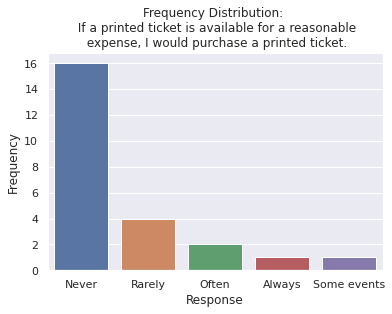

In [16]:
buy_printed = df['buy_printed'].value_counts()
sns.set(style='darkgrid')
sns.barplot(buy_printed.index, buy_printed.values)
plt.title('Frequency Distribution: \n If a printed ticket is available for a reasonable\n expense, I would purchase a printed ticket.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.show()

In [0]:
likert_2

['Never', 'Rarely', 'Some events', 'Often', 'Always']

In [0]:
df['buy_souvenir'].describe()

count           23
unique           5
top       Disagree
freq             7
Name: buy_souvenir, dtype: object

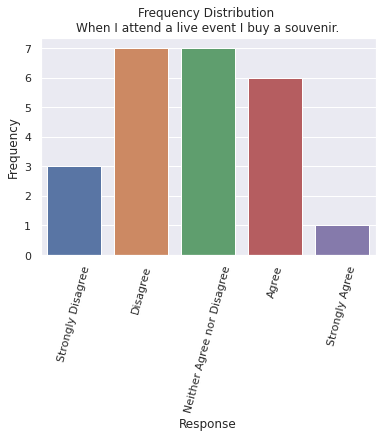

In [17]:
likert_order=['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']
buy_souvenir = df['buy_souvenir'].value_counts().loc[likert_order]
sns.set(style='darkgrid')
sns.barplot(buy_souvenir.index, buy_souvenir.values)
plt.title('Frequency Distribution \nWhen I attend a live event I buy a souvenir.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.xticks(rotation=75)
plt.show()

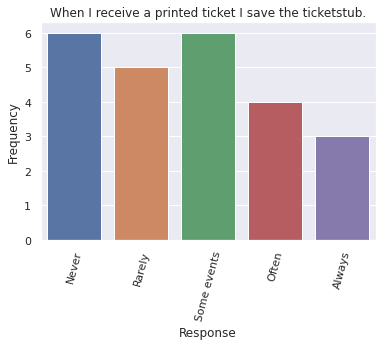

In [18]:
likert_2 = ['Never', 'Rarely', 'Some events', 'Often', 'Always']
save_stub = df['save_stub'].value_counts().loc[likert_2]
sns.set(style='darkgrid')
sns.barplot(save_stub.index, save_stub.values)
plt.title('When I receive a printed ticket I save the ticketstub.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [0]:
# describe method dropna = true by default
df['save_stub'].describe()

count        24
unique        5
top       Never
freq          6
Name: save_stub, dtype: object

6/2 Notes: this code is unchanged from yesterday, but does not run today. This will need to be investigated later!!\n
6/3 Notes: .loc error related to 'strongly Disagree' not appearing in enjoy_music dataframe. I'm certain a work around would be easy, but it is not significant to analysis. It is enough to know value is zero. The error did not flag before, because we had not filtered the dataframe to only our target market. We had responses for each value before.

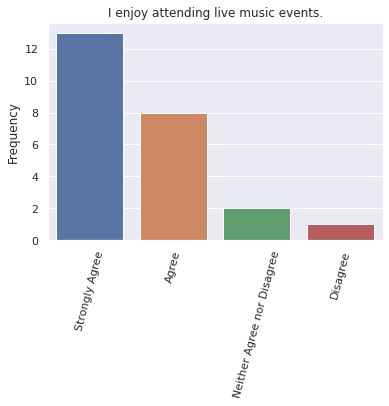

In [0]:
enjoy_music = df['enjoy_music'].value_counts()
sns.barplot(enjoy_music.index, enjoy_music.values)
plt.title('I enjoy attending live music events.')
plt.ylabel('Frequency')
#plt.xlabel('Response')
plt.xticks(rotation = 75)
plt.show()

In [0]:
enjoy_music.describe() #

count     4.00
mean      5.75
std       5.50
min       1.00
25%       1.75
50%       4.50
75%       8.50
max      13.00
Name: enjoy_music, dtype: float64

I need to find the error in likert_order. 'Agree' records twice and Disagree has no results.
5/30 Notes: Issue resolved

6/1: Playing around with plotting, unlikely to keep

# Week 5 Homework

In [0]:
from IPython import display
from ipywidgets import interact, widgets

In [0]:
#pip install IPython

In [0]:
import re
import mailbox
import csv

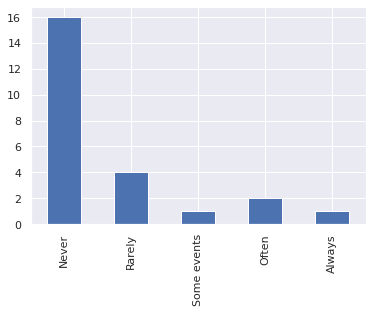

In [0]:
#Measure of Central Tendency for outcome variable, purchase a printed ticket
df['buy_printed'].value_counts().loc[likert_2].plot(
    kind='bar'

    )

In [0]:
event_order =['0 - 1', '2-3', '4-6', '7-9', '10-12', '13 or more.']
abc=pd.crosstab(df['buy_printed'], df['event_att'])
abc= abc[event_order]
abc.sort_index(level=likert_2, inplace=True)
#abc.sort_values(by=likert_2, axis=0)
abc.head()

event_att,0 - 1,2-3,4-6,7-9,10-12,13 or more.
buy_printed,,,,,,
Always,0,0,0,0,0,1
Never,1,5,7,1,1,1
Often,0,0,1,0,0,1
Rarely,0,0,2,1,1,0
Some events,0,0,1,0,0,0


Text(0.5, 1.0, 'If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')

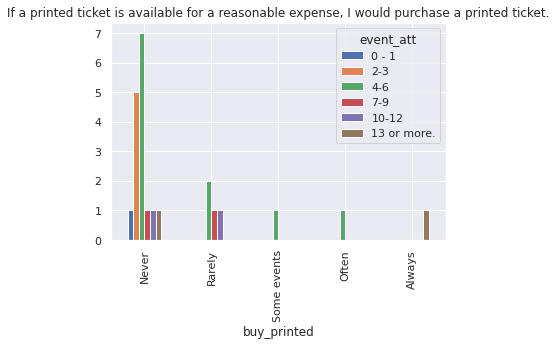

In [0]:
#Our outcome variable, buy ticket
abc.loc[likert_2].plot(kind='bar')
plt.title('If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')

This is a problem. Our desired outcome, purchasing a printed ticket, is showing limited interest among respondants who frequently attend live shows.

In [0]:
def invariate(question, likert_type):
  column_frequency = df[question].value_counts().loc[likert_type]
  sns.barplot(column_frequency.index, column_frequency.values)
  abc=pd.crosstab(df['buy_printed'], df[question])
  abc=abc[likert_type]
  #abc.sort_index(level=likert_2)
  plt.title('Response to '+ question +'.')
  plt.ylabel('Frequency')
  plt.xlabel('Response')
  plt.xticks(rotation = 75)
  plt.show()
  print(abc.head())

In [0]:
print(likert_2, likert_order, event_order)

['Never', 'Rarely', 'Some events', 'Often', 'Always'] ['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree'] ['0 - 1', '2-3', '4-6', '7-9', '10-12', '13 or more.']


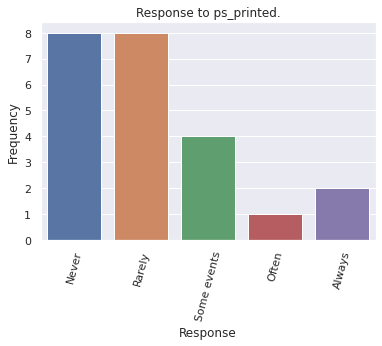

ps_printed   Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           0       0            0      0       1
Never            6       6            2      1       1
Often            0       0            1      0       0
Rarely           2       2            0      0       0
Some events      0       0            1      0       0


In [0]:
invariate('ps_printed', likert_2)

If I attend a live event with significance to the team or performer, such as a no hitter, I will purchase a printed ticket.

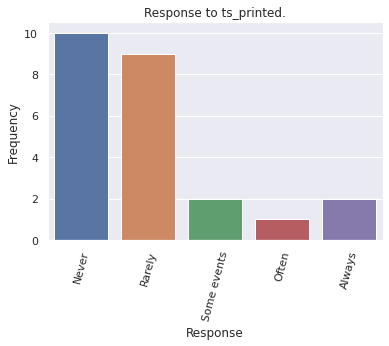

ts_printed   Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           0       0            0      0       1
Never            8       6            1      1       0
Often            0       1            0      0       1
Rarely           2       2            0      0       0
Some events      0       0            1      0       0


In [0]:
invariate('ts_printed', likert_2)

If I attend a live event with personal significance, 
such as a family reunion or a loved ones' first game,
I will purchase a customized printed ticket.


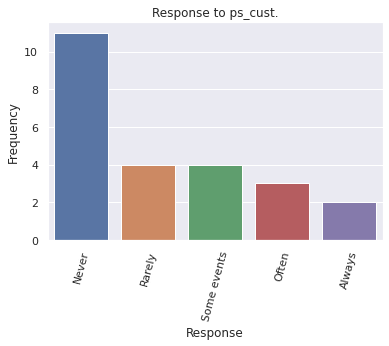

ps_cust      Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           0       0            0      1       0
Never            9       2            3      1       1
Often            0       0            0      1       1
Rarely           2       2            0      0       0
Some events      0       0            1      0       0


In [0]:
print("If I attend a live event with personal significance, \nsuch as a family reunion or a loved ones' first game,\nI will purchase a customized printed ticket.")
invariate('ps_cust', likert_2)

In [0]:
#Two-Way Table indicating Buy Souvenir and Buy Printed variables
grouped_bs = df.groupby(['buy_souvenir', 'buy_printed'])
grouped_bs.size()

buy_souvenir                buy_printed
Agree                       Never          3
                            Often          1
                            Rarely         2
Disagree                    Never          5
                            Rarely         2
Neither Agree nor Disagree  Never          5
                            Often          1
                            Some events    1
Strongly Agree              Always         1
Strongly Disagree           Never          3
dtype: int64

In [0]:
grouped_bs = df.groupby(['enjoy_music', 'buy_printed'])
grouped_bs.size()

enjoy_music                 buy_printed
Agree                       Never          5
                            Often          1
                            Rarely         2
Disagree                    Never          1
Neither Agree nor Disagree  Never          2
Strongly Agree              Always         1
                            Never          8
                            Often          1
                            Rarely         2
                            Some events    1
dtype: int64

In [0]:
#Dependant Variable
df.buy_printed.describe()

count        23
unique        5
top       Never
freq         16
Name: buy_printed, dtype: object

In [0]:
Always_df=df[df['buy_printed']=="Always"]
Often_df=df[df['buy_printed']=="Often"]
Se_df=df[df['buy_printed']=="Some events"]
Rarely_df=df[df['buy_printed']=="Rarely"]
Never_df=df[df['buy_printed']=="Never"]

In [0]:
Always_list=Always_df['buy_printed'].value_counts()
Often_list=Often_df['buy_printed'].value_counts()
Se_list=Se_df['buy_printed'].value_counts()
Rarely_list=Rarely_df['buy_printed'].value_counts()
Never_list=Never_df['buy_printed'].value_counts()

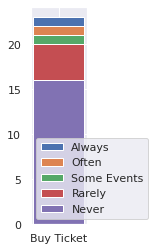

In [0]:
fig, ax = plt.subplots(figsize=(1, 4))
ax.bar('Buy Ticket', Always_list.values, bottom = 22, label='Always', width=0.85)
ax.bar('Buy Ticket', Often_list.values, bottom=21, label= 'Often', width=0.85)
ax.bar('Buy Ticket', Se_list.values, bottom=20, label='Some Events', width=0.85)
ax.bar('Buy Ticket', Rarely_list.values, bottom=Never_list.values, label= 'Rarely', width=0.85)
ax.bar('Buy Ticket', Never_list.values, bottom=0, label= 'Never', width=0.85)
ax.legend()

No handles with labels found to put in legend.


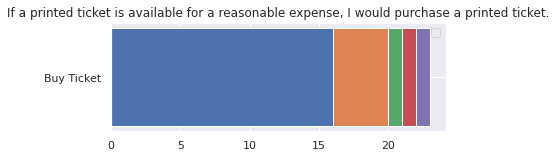

In [0]:
fig, ax = plt.subplots(figsize = (6, 2))
ax.barh('Buy Ticket', Never_list.values, .8, left=0)
ax.barh('Buy Ticket', Rarely_list.values, .79,left=Never_list.values)
ax.barh('Buy Ticket', Se_list.values, .8, left=20)
ax.barh('Buy Ticket', Often_list.values, .79, left=21)
ax.barh('Buy Ticket', Always_list.values, .8, left=22)
ax.set_title('If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')
ax.legend()

In [0]:
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

In [0]:
df_q_likert_order = df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir']]
df_q_likert_2= df[['save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust', 'na_printed', 'na_cust']]

In [0]:
df_q_likert_2.head()

,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
1,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never
2,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely
3,Never,Rarely,Rarely,Some events,Never,Some events,Some events,Rarely,Rarely,Never,Never
4,Rarely,Rarely,Rarely,Rarely,Never,Rarely,Never,Never,Never,Never,Never
6,Always,Some events,Some events,Often,Never,Always,Always,Some events,Some events,Never,Never


I am essentially transposing the dataframe to lend itself to data Viz

In [0]:
#pd.get_dummies(df.stack()).groupby(level=1).sum()
#df.values
v = df_q_likert_2.values
n, m = v.shape
f, u = pd.factorize(v.ravel())

df_q_likert_2 = pd.DataFrame(
    np.eye(u.size, dtype=int)[f].reshape(n, m, -1).sum(0),
    df_q_likert_2.columns, u
)
v = df_q_likert_order.values
n, m = v.shape
f, u = pd.factorize(v.ravel())

df_q_likert_order = pd.DataFrame(
    np.eye(u.size, dtype=int)[f].reshape(n, m, -1).sum(0),
    df_q_likert_order.columns, u
)

In [0]:
df_q_likert_2 = df_q_likert_2[likert_2]
df_q_likert_order = df_q_likert_order[likert_order]

In [0]:
df_q_likert_2.shape #Describes interest in product

(11, 5)

In [0]:
df_q_likert_2.describe()

,Never,Rarely,Some events,Often,Always
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.909091,6.545455,4.000000,1.454545,2.090909
std,6.057302,3.205110,2.645751,1.572491,0.831209
min,3.000000,2.000000,1.000000,0.000000,1.000000
25%,4.500000,4.000000,2.000000,0.000000,1.500000
50%,10.000000,6.000000,4.000000,1.000000,2.000000
75%,13.500000,9.000000,6.000000,2.500000,3.000000
max,19.000000,11.000000,8.000000,4.000000,3.000000


In [0]:
df_q_likert_2[5:11] #Describes our sample population

,Never,Rarely,Some events,Often,Always
ps_printed,8,8,4,1,3
ps_cust,11,4,4,3,2
ts_printed,10,9,2,1,2
ts_cust,11,9,2,0,2
na_printed,19,2,2,0,1
na_cust,19,3,1,0,1


([<matplotlib.axis.XTick at 0x7fa073534320>,
 [Text(0, 0, 'Personal significance|\nGeneric Printed'),
  Text(0, 0, 'Personal significance|\nCustom Printed'),
  Text(0, 0, 'Team significance|\nGeneric Printed'),
  Text(0, 0, 'Team significance|\nCustom Printed')])

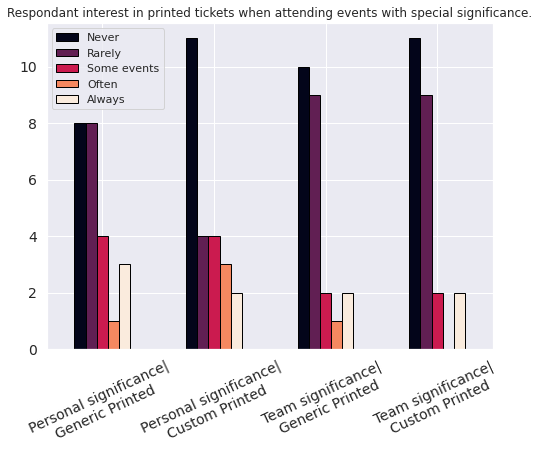

In [0]:
jibberish = ('Personal significance|\nGeneric Printed', 'Personal significance|\nCustom Printed', 'Team significance|\nGeneric Printed', 'Team significance|\nCustom Printed')
y_posit = np.arange(len(jibberish))
df_q_likert_2[5:9].plot(
    kind='bar',
    figsize=(8, 6),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Respondant interest in printed tickets when attending events with special significance.'
    ).yaxis.label.set_visible(False)
plt.xticks(y_posit, jibberish, rotation = 25)

In [0]:
df_q_likert_order[:4]

,Strongly Disagree,Disagree,Neither Agree nor Disagree,Agree,Strongly Agree
enjoy_music,0,1,2,8,13
enjoy_sports,0,0,5,6,13
enjoy_outdoor,1,2,3,12,6
enjoy_culture,0,1,4,14,5


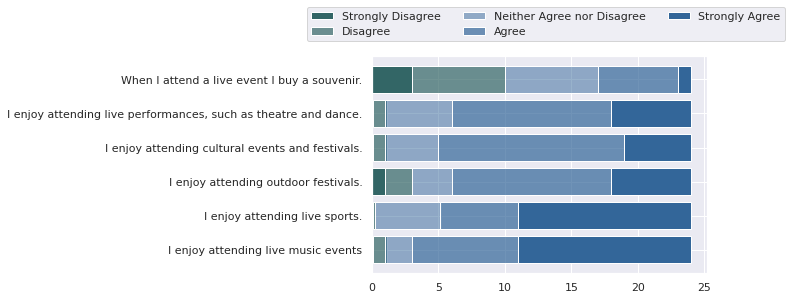

In [0]:
question_labels = ('I enjoy attending live music events', 'I enjoy attending live sports.', 'I enjoy attending outdoor festivals.', 'I enjoy attending cultural events and festivals.', 'I enjoy attending live performances, such as theatre and dance.', 'When I attend a live event I buy a souvenir.')

#question_labels[0] Enjoy Music
plt.barh(question_labels[0], width=0.1, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[0], left=0.1, width=1, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[0], left=1, width=2, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[0], left=3, width=8., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[0], left=11, width=13., color=(0.2, 0.4, .6, 1))
#question_labels[1] Enjoy Sports
plt.barh(question_labels[1], width=0.1, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[1], left=0.1, width=.1, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[1], left=.2, width=5, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[1], left=5.1, width=6., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[1], left=11, width=13., color=(0.2, 0.4, .6, 1))
#question_labels[2] Enjoy Outdoor
plt.barh(question_labels[2], width=1, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[2], left=1, width=2, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[2], left=3, width=3, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[2], left=6, width=12, color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[2], left=18, width=6., color=(0.2, 0.4, .6, 1))
#question_labels[3] Enjoy Culture
plt.barh(question_labels[3], width=0.1, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[3], left=0.1, width=1, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[3], left=1, width=4, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[3], left=5, width=14., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[3], left=19, width=5., color=(0.2, 0.4, .6, 1))
#question_labels[4] Enjoy Performances
plt.barh(question_labels[4], width=0.1, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[4], left=0.1, width=1, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[4], left=1, width=5, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[4], left=6, width=12., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[4], left=18, width=6., color=(0.2, 0.4, .6, 1))
#question_labels[5] Buy Souvenir
plt.barh(question_labels[5], width=3, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[5], left=3, width=7, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[5], left=10, width=7, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[5], left=17, width=6, color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[5], left=23, width=1., color=(0.2, 0.4, .6, 1))

#Add Legend to plot
# plt.text(-1,6, 'Strongly \nDisagree', color=(0.2, 0.4, 0.4, 1))
# plt.text(4,6.2, likert_order[1], color=(0.2, 0.4, 0.4, .7))
# plt.text(11,6, 'Neither Agree \nnor Disagree', color=(0.2, 0.4, 0.6, .5))
# plt.text(18, 6.2, likert_order[3], color=(0.2, 0.4, .6, .7))
# plt.text(22,6, 'Strongly \nAgree', color=(0.2, 0.4, 0.6, 1))
plt.legend(likert_order, ncol=3, bbox_to_anchor=(1.25, 1.25))
plt.show()

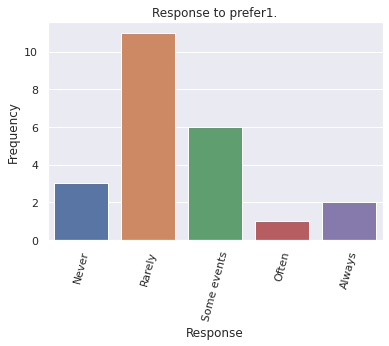

prefer1      Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           0       0            0      0       1
Never            3       8            3      1       0
Often            0       1            0      0       1
Rarely           0       2            2      0       0
Some events      0       0            1      0       0


In [0]:
invariate('prefer1', likert_2)

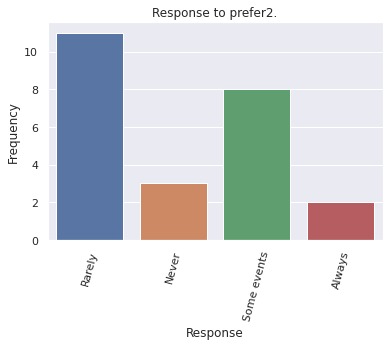

prefer2      Rarely  Never  Some events  Always
buy_printed                                    
Always            0      0            0       1
Never            10      3            3       0
Often             1      0            0       1
Rarely            0      0            4       0
Some events       0      0            1       0


In [0]:
invariate('prefer2', prefer2_list)

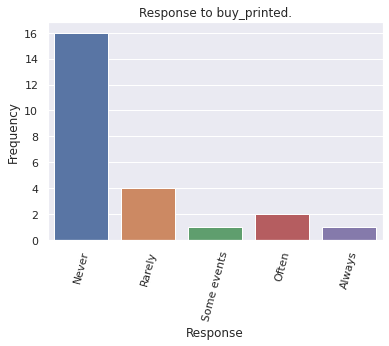

buy_printed  Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           0       0            0      0       1
Never           16       0            0      0       0
Often            0       0            0      2       0
Rarely           0       4            0      0       0
Some events      0       0            1      0       0


In [0]:
invariate('buy_printed', likert_2)

In [0]:
df_q_likert_2[4:5].values

array([[16,  4,  1,  2,  1]])

## Test of Significance -> It is important to note that we have less than 5 respondants expressing an interest in our product. This will create problems for the chi-squared test

In [0]:
abc

event_att,0 - 1,2-3,4-6,7-9,10-12,13 or more.
buy_printed,,,,,,
Always,0,0,0,0,0,1
Never,1,5,7,1,1,1
Often,0,0,1,0,0,1
Rarely,0,0,2,1,1,0
Some events,0,0,1,0,0,0


In [0]:
#table=pd.crosstab(df['save_stub'], df['buy_printed'])
table = pd.crosstab(df['buy_souvenir'], df['buy_printed'])

In [0]:
from scipy.stats import chi2_contingency, chi2


In [21]:
#Degrees of freedom: (4X4)
table

buy_printed,Always,Never,Often,Rarely,Some events
buy_souvenir,,,,,
Agree,0,3,1,2,0
Disagree,0,5,0,2,0
Neither Agree nor Disagree,0,5,1,0,1
Strongly Agree,1,0,0,0,0
Strongly Disagree,0,3,0,0,0


In [0]:
stat, p, dof, expected = chi2_contingency(table)

In [23]:
# interpret test-statistic

print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

buy_printed                 Always  Never  Often  Rarely  Some events
buy_souvenir                                                         
Agree                            0      3      1       2            0
Disagree                         0      5      0       2            0
Neither Agree nor Disagree       0      5      1       0            1
Strongly Agree                   1      0      0       0            0
Strongly Disagree                0      3      0       0            0
dof=16
[[0.25       4.         0.5        1.         0.25      ]
 [0.29166667 4.66666667 0.58333333 1.16666667 0.29166667]
 [0.29166667 4.66666667 0.58333333 1.16666667 0.29166667]
 [0.04166667 0.66666667 0.08333333 0.16666667 0.04166667]
 [0.125      2.         0.25       0.5        0.125     ]]
probability=0.950, critical=26.296, stat=32.036
Dependent (reject H0)
significance=0.050, p=0.010
Dependent (reject H0)


In [0]:
##Kruskal Wallis H-test I will need to map this using a lambda function.
from scipy.stats import mstats
df.shape
em=df['enjoy_music']
es=df['enjoy_sports']
eo=df['enjoy_outdoor']
ec=df['enjoy_culture']
ep=df['enjoy_performances']
bs=df['buy_souvenir']

In [0]:
print("Kruskal-Wallis one-way analysis of variance:")
H, pval = mstats.kruskalwallis(em, es, eo, ec, ep, bs)
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
  print("Reject. One or more Samples influences another")
if pval > 0.05:
  print("Accept. Same Distributions")


Kruskal-Wallis one-way analysis of variance:


TypeError: ignored

#Week 6 Homework

In [0]:
df_chi= df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'buy_printed']]